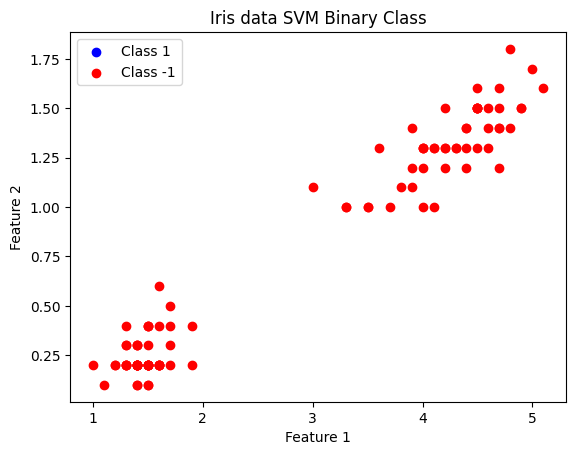

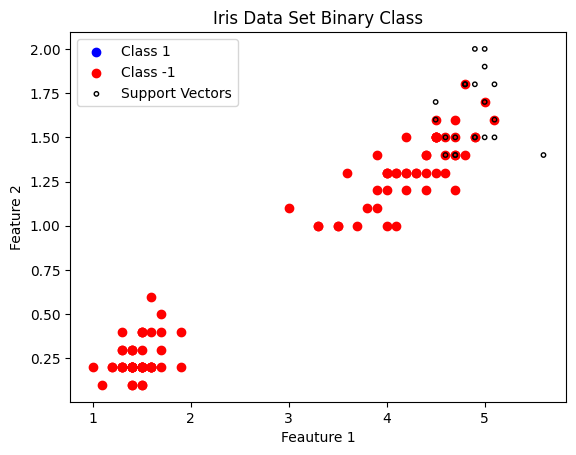

Training examples selected as support vectors:
[[1.  0.2]
 [1.5 0.4]
 [4.4 1.4]
 [1.6 0.2]
 [1.3 0.2]
 [5.  1.9]
 [4.5 1.5]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [5.1 1.9]
 [4.5 1.6]
 [4.7 1.5]
 [1.3 0.4]
 [1.5 0.2]
 [5.1 1.5]
 [5.5 1.8]
 [4.4 1.4]
 [6.1 2.5]
 [4.2 1.3]
 [4.5 1.5]
 [1.4 0.2]
 [6.7 2. ]
 [4.1 1. ]
 [1.4 0.2]
 [1.3 0.3]
 [1.9 0.4]
 [3.5 1. ]
 [4.9 1.8]
 [1.9 0.2]
 [1.6 0.2]
 [4.2 1.3]
 [1.5 0.2]
 [4.2 1.2]
 [1.4 0.2]
 [4.3 1.3]
 [5.  2. ]
 [1.4 0.2]
 [4.8 1.8]
 [5.1 1.9]
 [4.  1. ]
 [4.5 1.5]
 [5.4 2.3]
 [4.  1.3]
 [1.7 0.4]
 [3.3 1. ]
 [5.3 1.9]
 [1.4 0.2]
 [1.2 0.2]
 [5.  1.7]
 [1.5 0.2]
 [5.1 2.4]
 [1.5 0.2]
 [4.8 1.8]
 [5.7 2.3]
 [5.1 1.6]
 [5.6 1.4]
 [6.1 2.3]
 [4.  1.3]
 [1.4 0.2]
 [5.  1.5]
 [6.  1.8]
 [1.5 0.2]
 [1.4 0.3]
 [1.3 0.2]
 [4.9 1.5]
 [5.6 2.4]
 [1.4 0.3]
 [5.5 2.1]
 [1.3 0.2]
 [4.7 1.4]
 [4.6 1.5]
 [4.8 1.8]
 [4.7 1.4]
 [1.6 0.2]
 [4.6 1.4]
 [4.6 1.3]
 [4.4 1.2]
 [1.5 0.2]
 [4.1 1.3]
 [5.7 2.1]
 [1.4 0.2]
 [4.9 1.5]
 [5.6 1.8]
 [4.9 2. ]
 [5.1 1.8]
 [1.7 0

In [ ]:
#SVM for classification binary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

y[y == 0] = 1
y[y == 1] = -1

plt.scatter(X[y ==1, 0], X[y ==1,1], color = 'blue', label = 'Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color = 'red', label = 'Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Iris data SVM Binary Class')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

plt.scatter(X[y ==1 , 0], X[y == 1, 1], color = 'blue', label = 'Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], color = 'red', label = 'Class -1')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[: , 1], s = 10, facecolor = 'none', edgecolors = 'black', label = 'Support Vectors')

plt.xlabel('Feauture 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Iris Data Set Binary Class')
plt.show()


support_vector_indicies = np.where(np.isin(X_train, clf.support_vectors_, assume_unique = True).all(axis =1))[0]

print("Training examples selected as support vectors:")
print(X_train[support_vector_indicies])
new_examples = np.array([[4.0,2.0], [6.0, 3.0]])

predictions = clf.predict(new_examples)
print(f'Predictions {predictions}')



y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy on Test Set: {accuracy}")





<ipython-input-14-578bccb4e719>:39: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, alpha = 0.3, label = f'Class {class_label}')
<ipython-input-14-578bccb4e719>:39: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, alpha = 0.3, label = f'Class {class_label}')
<ipython-input-14-578bccb4e719>:39: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, alpha = 0.3, label = f'Class {class_label}')


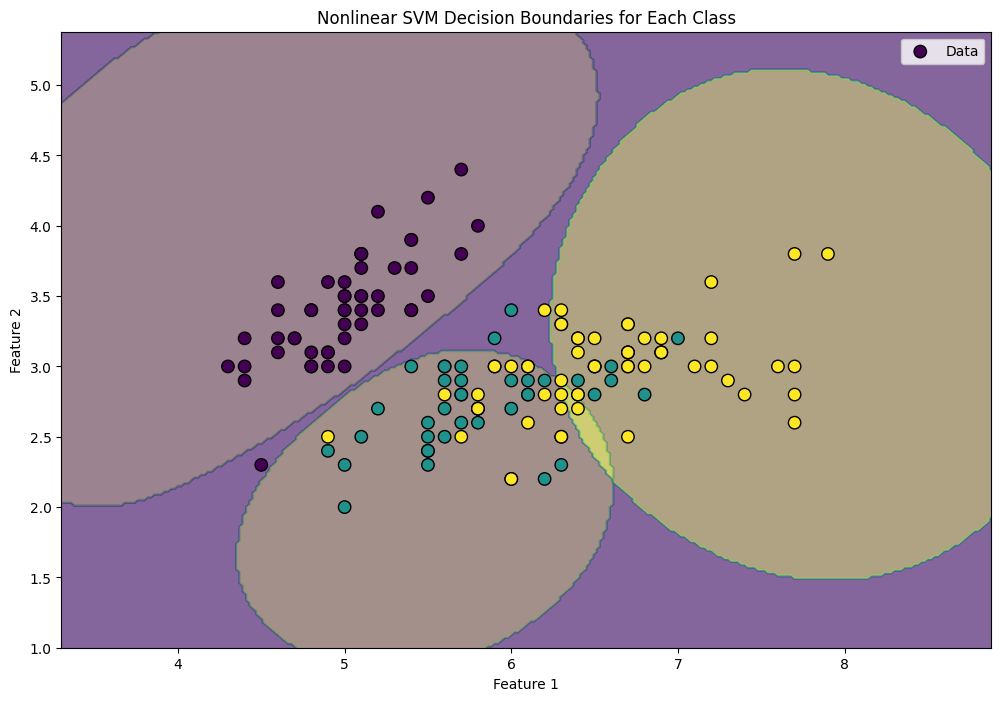

Accuracy of Classification 0.78
Accuracy of Classification 0.90


In [ ]:
#SVM classification Multi-class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]                                     #Utilize all multi features
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)          #Split data into test train with sklearn

classifiers = {}

for class_label in np.unique(y):
  binary_labels = np.where(y_train == class_label, 1, -1)                            #generate the binary lables for the current class

  clf = SVC(kernel = 'rbf', gamma = 'auto')                                          #Where the non-linear SVM will be trained with the RBF kernel and then will be stored
  clf.fit(X_train,binary_labels)

  classifiers[class_label] = clf

#plot the decision boundaries in order to check results
plt.figure(figsize = (12,8))

for class_label, clf in classifiers.items():
   h = .02 # Step size in the mesh
   x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   y_min, y_max = X[: , 1].min() - 1, X[: , 1].max() + 1

   xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)

   plt.contourf(xx, yy, Z, alpha = 0.3, label = f'Class {class_label}')


plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', marker = 'o', s = 80, label = 'Data')                #Display the plot and graph in order to ensure successful evaluation
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Nonlinear SVM Decision Boundaries for Each Class')
plt.legend()
plt.show()


train_scores = np.zeros((X_train.shape[0], len(classifiers)))                     #one vs all on the train set


for class_label, clf in classifiers.items():
  train_scores[:, class_label] = clf.decision_function(X_train)

train_predictions = np.argmax(train_scores, axis = 1)


test_scores = np.zeros((X_test.shape[0], len(classifiers)))                      #one vs all prediction on the test set

for class_label, clf in classifiers.items():
  test_scores[:, class_label] = clf.decision_function(X_test)

test_predictions = np.argmax(test_scores, axis =1)


train_accuracy = accuracy_score(y_train, train_predictions)                        #calculate the trainig accuracy for the training set and the test set
print(f"Accuracy of Classification {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy of Classification {test_accuracy:.2f}")

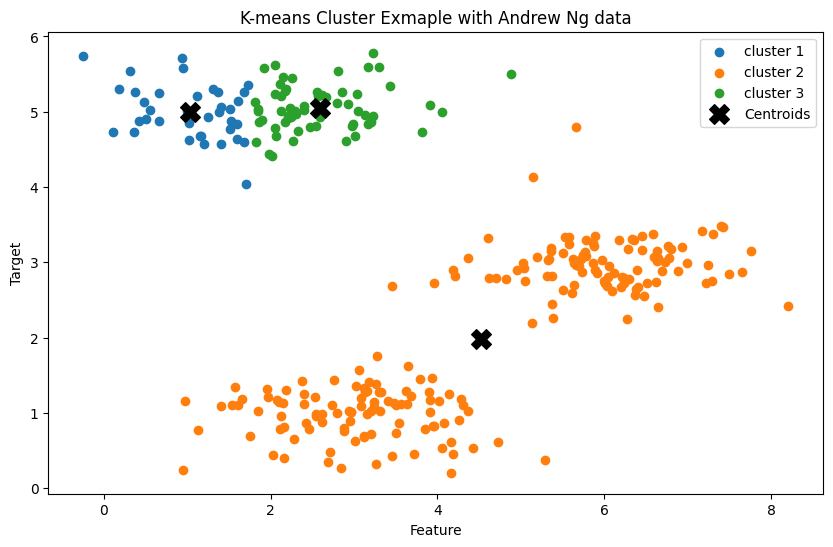

In [ ]:
#implimneting k-means algorithm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, k, max_iters = 100):
  num_examples, num_features = X.shape

  centroids_indicies = np.random.choice(num_examples, k, replace = False)                        #Randomly intialize centroids
  centroids = X[centroids_indicies, :]

  prev_centroids = np.zeros_like(centroids)                                                      #Store the previous centroids in order to cehck for convergence later in the function


                                                                                                 #Intialize arrays to store assignmnets and dispersion costs
  assignments = np.zeros(num_examples, dtype = int)
  costs = np.zeros(max_iters)

  for iteration in range(max_iters):

    for i in range(num_examples):                                                                #assignment of each example to the nearest centroid
      distances = np.linalg.norm(X[i, :] - centroids, axis = 1)
      assignments[i] = np.argmin(distances)

    for j in range(k):                                                                           #recalculate centroids based on assigned example
      cluster_points = X[assignments ==j, :]
      if len(cluster_points) > 0:
        centroids[j, :] = np.mean(cluster_points, axis = 0)

    costs[iteration] = np.sum(np.linalg.norm(X - centroids[assignments, :], axis = 1))           #Calculate for the dipsersion cost per iteration


    if np.array_equal(centroids, prev_centroids):                                                 #Checks for convergence
      break

    np.copyto(prev_centroids, centroids)                                                          #Updates the previous centroids iwht the np.copyto command

  return centroids, assignments, costs[:iteration + 1]


df = pd.read_csv('/content/k-means data.csv')

X = df.iloc[:, :].values

k = 3
centroids, assignments, costs = k_means(X,k)

plt.figure(figsize = (10, 6))

for cluster_id in range(k):
  cluster_points = X[assignments == cluster_id, :]
  plt.scatter(cluster_points[:, 0], cluster_points[: , 1], label = f'cluster {cluster_id +1}')




plt.scatter(centroids[:, 0], centroids[:,1], marker = 'X', s = 200, c = 'black', label = 'Centroids')

plt.title('K-means Cluster Exmaple with Andrew Ng data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


